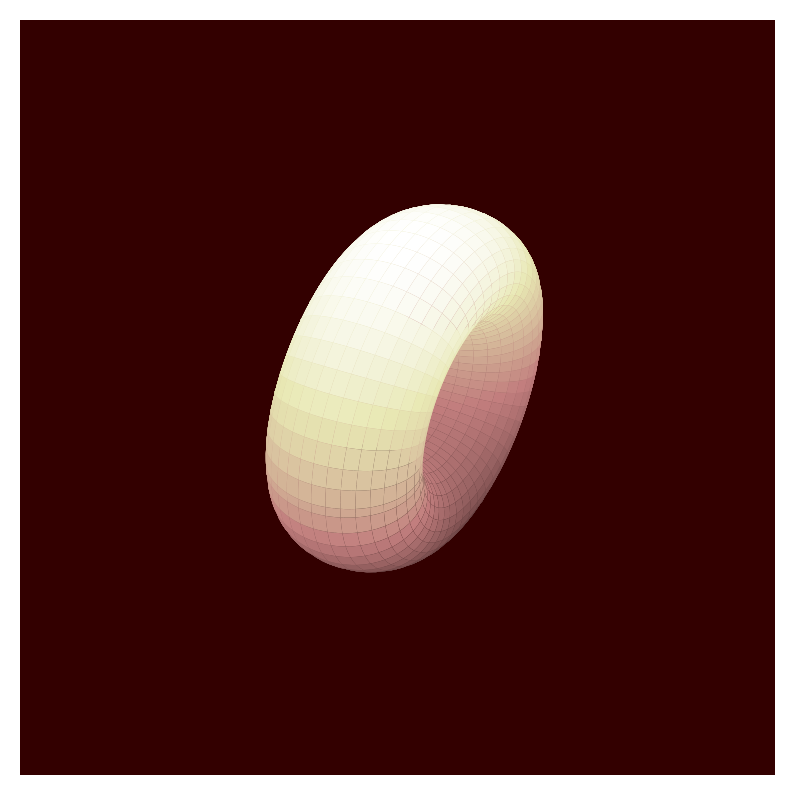

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# a and b are parameters
# c and d are constants
theta = np.linspace(0, 2*np.pi, 100)
theta, phi = np.meshgrid(theta, theta)
c, d = 2, 1
num_points = len(theta)

# x, y, z are 2d matrices of shape theta * theta. (x[0][0], y[0][0], z[0][0]) is one coordinate of the torus.
x = (c + d * np.cos(theta)) * np.cos(phi)
y = (c + d * np.cos(theta)) * np.sin(phi)
z = d * np.sin(theta)

# define a rotation matrix around an axis
a = np.pi/2
rotation_matrix_x = np.array([[1.0, 0, 0], 
                    [0, np.cos(a), np.sin(a)], 
                    [0, np.sin(a), np.cos(a)]])

# mesh_array is a (3, num_points, num_points) matrix
mesh_array = np.array([x, y, z])
# converting into coordinates: a  matrix of shape (num_points**2, 3)
coordinate_array = mesh_array.T.reshape(-1, 3)
# applying the rotation_matrix onto the coordinate_array: rotated_array is of shape (num_points**2, 3)
rotated_array = np.dot(coordinate_array, rotation_matrix_x) # nor sure how this works actually...
# converting it back into a matrix of shape 
rotated_mesh_array = rotated_array.T.reshape(3, dots, dots)
# then apply multiply with the rotation matrix (3, num_points, num_points) so that we can plot it using plot_surface

fig = plt.figure(figsize = (5,5), dpi = 200)
ax = plt.axes(projection = '3d')
ax.view_init(36, 26)
ax.set_facecolor([0.2, 0, 0]) # background colour
ax.set_zlim(-3,3)
ax.set_ylim(-3,3)
ax.dist = 10
plots = []
for i in range(5):
        # mesh_array is a (3, num_points, num_points) matrix
    mesh_array = np.array([x, y, z])
    # converting into coordinates: a  matrix of shape (num_points**2, 3)
    coordinate_array = mesh_array.T.reshape(-1, 3)
    # applying the rotation_matrix onto the coordinate_array: rotated_array is of shape (num_points**2, 3)
    rotated_array = np.dot(coordinate_array, rotation_matrix_x) # nor sure how this works actually...
    # converting it back into a matrix of shape 
    rotated_mesh_array = rotated_array.T.reshape(3, dots, dots)
    # then apply multiply with the rotation matrix (3, num_points, num_points) so that we can plot it using plot_surface

    plot = ax.plot_surface(rotated_mesh_array[0], rotated_mesh_array[1], rotated_mesh_array[2], rstride = 3, cstride = 2, cmap = 'pink')
    plots.append(plot)
    


ax.axis('off')
plt.show();
# can do wire frame...? or contourf3D...? check fractals_3d.py

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

t = np.linspace(0, 2 * np.pi, 50)
th, ph = np.meshgrid(t, t)
r = 0.4
x, y, z = 1.5*r * np.sin(ph), (2 + r * np.cos(ph)) * np.sin(th), (2 + r * np.cos(ph)) * np.cos(th)
Steps = 1001
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
plot=[ax.plot_surface(x, y, z+2,rstride=2,cstride=1,color='green',alpha=.5)]

ax.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[0, 4])
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

a = 0.5 * np.outer(np.cos(u), np.sin(v))
b = 0.5 * np.outer(np.sin(u), np.sin(v))
c = 0.4 * np.outer(np.ones(np.size(u)), np.cos(v))
elev = 10.0
rot = 80.0 / 180 * np.pi
ax.plot_surface(a, b, c+4,  rstride=4, cstride=4, color='b', linewidth=0)
theta = np.linspace(0, 20 * np.pi,1001)
ax.view_init(elev = elev, azim = 0)
ax.axis('off')
def update(num):
    plot[0].remove()
    x, y, z = 1.5 * r * np.sin(ph), (2 + r * np.cos(ph)) * np.sin(th), (2 + r * np.cos(ph)) * np.cos(th)
    plot[0] = ax.plot_surface(1.5 * r * np.sin(ph),(2 + r*np.cos(ph)) * np.sin(th),(z+2),rstride=2,cstride=1,color='green',alpha=.5)
    ax.view_init(azim=360*num/100, elev=10)
ani = animation.FuncAnimation(fig, update, 100,interval=40)
plt.show()